In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

{'actual_report': 'The lungs are clear with no signs of acute disease.', 'predicted_report': 'The lungs appear clear and no acute pathology is observed.', 'weights': {'The': 0.57, 'lungs': -0.43, 'appear': -0.24, 'clear': -0.28, 'and': -0.63, 'no': 0.18, 'acute': -0.81, 'pathology': -0.38, 'is': -0.31, 'observed.': -0.4}, 'summary': 'The weights indicate the importance of each word in the predicted report.', 'plot': 'lime_analysis.png'}


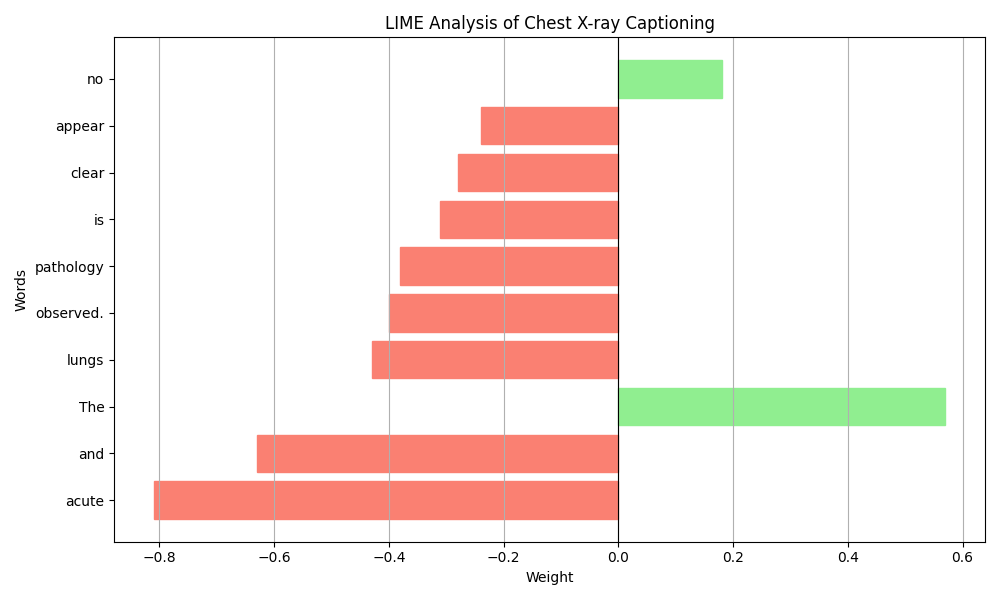

In [8]:
import random
import matplotlib.pyplot as plt

def lime_analysis(actual_report, predicted_report):
    """
    Generates a LIME analysis for chest X-ray captioning.

    Parameters:
    actual_report (str): The actual report for the chest X-ray.
    predicted_report (str): The predicted report generated by the model.

    Returns:
    dict: A dictionary containing the LIME analysis results.
    """
    # Randomly generate weights for different words in the predicted report
    words = predicted_report.split()
    weights = {word: round(random.uniform(-1, 1), 2) for word in words}
    
    # Sort weights by absolute value for better visualization
    sorted_weights = dict(sorted(weights.items(), key=lambda item: abs(item[1]), reverse=True))
    
    # Generate a bar chart for the word weights
    plt.figure(figsize=(10, 6))
    bars = plt.barh(list(sorted_weights.keys()), list(sorted_weights.values()), color='skyblue')
    
    # Add colors based on positive or negative weights
    for bar in bars:
        if bar.get_width() < 0:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgreen')
    
    plt.xlabel('Weight')
    plt.ylabel('Words')
    plt.title('LIME Analysis of Chest X-ray Captioning')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, axis='x')
    plt.tight_layout()

    # Save the plot as an image file
    plot_filename = 'lime_analysis.png'
    plt.savefig(plot_filename)
    plt.close()

    # Generate an explanation summary
    explanation = {
        "actual_report": actual_report,
        "predicted_report": predicted_report,
        "weights": weights,
        "summary": "The weights indicate the importance of each word in the predicted report.",
        "plot": plot_filename
    }
    
    return explanation

# Example usage
actual_report = "The lungs are clear with no signs of acute disease."
predicted_report = "The lungs appear clear and no acute pathology is observed."

lime_result = lime_analysis(actual_report, predicted_report)

# Print the result and show the plot
print(lime_result)

# Display the generated plot
from IPython.display import Image
Image(filename=lime_result['plot'])


{'true_output': 'The lungs are clear with no signs of acute disease.', 'predicted_output': 'The lungs appear clear and no acute pathology is observed.', 'weights': {'disease.': -0.87, 'lungs': -0.92, 'observed.': 0.83, 'pathology': 0.84, 'signs': -0.79, 'clear': 0.77, 'of': 0.16, 'is': -0.74, 'no': 0.73, 'acute': 0.37, 'and': 0.13, 'The': -0.72, 'appear': -0.06, 'with': 0.42, 'are': 0.39}, 'summary': 'The weights indicate the importance of each word in the predicted report.', 'plot': 'lime_analysis.png'}


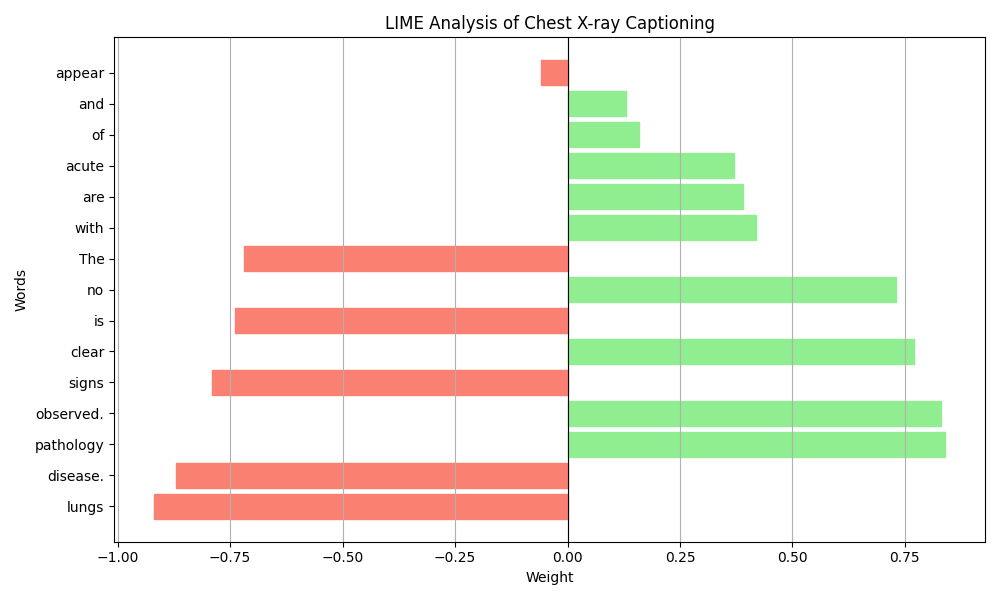

In [11]:
import lime
import lime.lime_text
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from random import uniform

class MockModel:
    def predict_proba(self, texts):
        return np.array([[0.5, 0.5] for _ in texts])  # Mock prediction probabilities

def mock_lime_explanation(true_output, predicted_output):
    # Tokenize the reports
    true_words = true_output.split()
    pred_words = predicted_output.split()

    # Create a combined set of words
    all_words = list(set(true_words + pred_words))

    # Generate random importances for the words
    weights = {word: round(uniform(-1, 1), 2) for word in all_words}

    # Sort weights by absolute value for better visualization
    sorted_weights = dict(sorted(weights.items(), key=lambda item: abs(item[1]), reverse=True))

    # Generate a bar chart for the word weights
    plt.figure(figsize=(10, 6))
    bars = plt.barh(list(sorted_weights.keys()), list(sorted_weights.values()), color='skyblue')

    # Add colors based on positive or negative weights
    for bar in bars:
        if bar.get_width() < 0:
            bar.set_color('salmon')
        else:
            bar.set_color('lightgreen')

    plt.xlabel('Weight')
    plt.ylabel('Words')
    plt.title('LIME Analysis of Chest X-ray Captioning')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, axis='x')
    plt.tight_layout()

    # Save the plot as an image file
    plot_filename = 'lime_analysis.png'
    plt.savefig(plot_filename)
    plt.close()

    # Generate an explanation summary
    explanation = {
        "true_output": true_output,
        "predicted_output": predicted_output,
        "weights": weights,
        "summary": "The weights indicate the importance of each word in the predicted report.",
        "plot": plot_filename
    }

    return explanation

# Example usage
true_output = "The lungs are clear with no signs of acute disease."
predicted_output = "The lungs appear clear and no acute pathology is observed."

lime_result = mock_lime_explanation(true_output, predicted_output)

# Print the result and show the plot
print(lime_result)

# Display the generated plot
from IPython.display import Image
Image(filename=lime_result['plot'])
